
# Linear Regression Practice
<div class="alert alert-block alert-info">
This is just a sample I picked from GITHUB to practice a regression model with scikitlearn. 

> Data set has 985 Rows and 12 Columns.

> Goal is to identify variables impacting price of the house.




In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas_profiling
import seaborn as sns
import mpl_toolkits

import warnings
warnings.filterwarnings('ignore')

In [0]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
        border: 3px solid lightgray;
    }
</style>

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/linear-regression-video/master/data/sacremento_housing.csv', index_col=0)
data.head()

street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768

In [0]:
data.shape

(985, 12)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 100.0+ KB


In [0]:
data.sample(10)

street             city    zip state  beds  baths  sq__ft  \
162          5221 38TH AVE       SACRAMENTO  95824    CA     2      1     746   
892        1691 NOGALES ST       SACRAMENTO  95838    CA     4      2    1570   
468  2231 COUNTRY VILLA CT           AUBURN  95603    CA     2      2    1255   
125       9723 TERRAPIN CT        ELK GROVE  95757    CA     4      3    2354   
203        2028 ROBERT WAY       SACRAMENTO  95825    CA     2      1     810   
189        840 TRANQUIL LN             GALT  95632    CA     3      2    1266   
884        5628 GEORGIA DR  NORTH HIGHLANDS  95660    CA     3      1    1229   
526     2148 RANCH VIEW DR          ROCKLIN  95765    CA     0      0       0   
583             398 1ST ST          LINCOLN  95648    CA     0      0       0   
596     27 CRYSTALWOOD CIR          LINCOLN  95648    CA     0      0       0   

            type                     sale_date   price   latitude   longitude  
162  Residential  Tue May 20 00:00:00 EDT 2008   78400  38.518044 -121.443555  
892  Residential  Thu May 15 00:00:00 EDT 2008  126854  38.631925 -121.427775  
468        Condo  Mon May 19 00:00:00 EDT 2008  260000  38.931671 -121.097862  
125  Residential  Wed May 21 00:00:00 EDT 2008  335750  38.403492 -121.430224  
203  Residential  Tue May 20 00:00:00 EDT 2008  156000  38.609982 -121.419263  
189  Residential  Tue May 20 00:00:00 EDT 2008  140000  38.270617 -121.299205  
884  Residential  Thu May 15 00:00:00 EDT 2008  110000  38.669587 -121.379879  
526  Residential  Mon May 19 00:00:00 EDT 2008  413000  38.837455 -121.289337  
583  Residential  Mon May 19 00:00:00 EDT 2008    4897  38.886530 -121.288952  
596  Residential  Mon May 19 00:00:00 EDT 2008    4897  38.884985 -121.289399

In [0]:
data.describe(include = 'all')  

street        city           zip state        beds       baths  \
count             985         985    985.000000   985  985.000000  985.000000   
unique            981          39           NaN     2         NaN         NaN   
top     4734 14TH AVE  SACRAMENTO           NaN    CA         NaN         NaN   
freq                2         439           NaN   984         NaN         NaN   
mean              NaN         NaN  95750.697462   NaN    2.911675    1.776650   
std               NaN         NaN     85.176072   NaN    1.307932    0.895371   
min               NaN         NaN  95603.000000   NaN    0.000000    0.000000   
25%               NaN         NaN  95660.000000   NaN    2.000000    1.000000   
50%               NaN         NaN  95762.000000   NaN    3.000000    2.000000   
75%               NaN         NaN  95828.000000   NaN    4.000000    2.000000   
max               NaN         NaN  95864.000000   NaN    8.000000    5.000000   

             sq__ft         type                     sale_date          price  \
count    985.000000          985                           985     985.000000   
unique          NaN            4                             5            NaN   
top             NaN  Residential  Mon May 19 00:00:00 EDT 2008            NaN   
freq            NaN          917                           268            NaN   
mean    1312.918782          NaN                           NaN  233715.951269   
std      856.123224          NaN                           NaN  139088.818896   
min     -984.000000          NaN                           NaN -210944.000000   
25%      950.000000          NaN                           NaN  145000.000000   
50%     1304.000000          NaN                           NaN  213750.000000   
75%     1718.000000          NaN                           NaN  300000.000000   
max     5822.000000          NaN                           NaN  884790.000000   

          latitude   longitude  
count   985.000000  985.000000  
unique         NaN         NaN  
top            NaN         NaN  
freq           NaN         NaN  
mean     38.445121 -121.193371  
std       5.103637    5.100670  
min    -121.503471 -121.551704  
25%      38.482704 -121.446119  
50%      38.625932 -121.375799  
75%      38.695589 -121.294893  
max      39.020808   38.668433

In [0]:
pandas_profiling.ProfileReport(data)

# Initial Observations
<div class="alert alert-block alert-warning">
    
- Removal of duplicate rows 
- Drop rows with latitude,	longitude, state, street, sale_date, zip
- Zeros in data for Bedroom & Bathroom is justified as, there would be houses which will not have bathroom or bedroom (e.g. Condos) at time such houses will be having low price valuation compared to other ones (Quick analysis can justify, if not can be replaced by Mean)
- Square Feet cannot be zero, can be replaced with median value

**Dropping duplicate rows**

In [0]:
data = data.drop_duplicates(subset=None, keep='first', inplace=False)

**Dropping few columns which will not impact our analysis**

In [0]:
data = data.drop(['latitude', 'longitude', 'state', 'street', 'sale_date', 'zip'], axis=1)

In [0]:
data.rename(columns={'sq__ft':'sqft'}, inplace=True)
 
print(data.columns)

Index(['city', 'beds', 'baths', 'sqft', 'type', 'price'], dtype='object')


**Quick check on missing values**

In [0]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

Total  Percent
price      0      0.0
type       0      0.0
sqft       0      0.0
baths      0      0.0
beds       0      0.0
city       0      0.0

In [0]:
data.sample(5)

city  beds  baths  sqft         type   price
456  SACRAMENTO     4      2  1816  Residential  240000
589     LINCOLN     0      0     0  Residential    4897
498   ELK GROVE     5      3  3468  Residential  320000
164  SACRAMENTO     4      2  1316  Residential   89000
135      WILTON     3      2  2110  Residential  372000

**Removing bath/beds with zero values**

In [0]:
data1 = data[data['baths']!= 0]    

In [0]:
data1.baths.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [0]:
data1.beds.unique()

array([2, 3, 1, 4, 5, 8, 6], dtype=int64)

In [0]:
data1['sqft']=data1['sqft'].replace(0,data1['sqft'].median())

In [0]:
pandas_profiling.ProfileReport(data1)

# Hurraayyy!! data is clean now ready for EDA & Regression

In [0]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 0 to 984
Data columns (total 6 columns):
city     875 non-null object
beds     875 non-null int64
baths    875 non-null int64
sqft     875 non-null int64
type     875 non-null object
price    875 non-null int64
dtypes: int64(4), object(2)
memory usage: 47.9+ KB


In [0]:
data1 = data1[['city','type','price','sqft','beds','baths']]    # quick reorganize columns

In [0]:
data1.sample()

city   type   price  sqft  beds  baths
908  SACRAMENTO  Condo  150454   924     2      1

# EDA

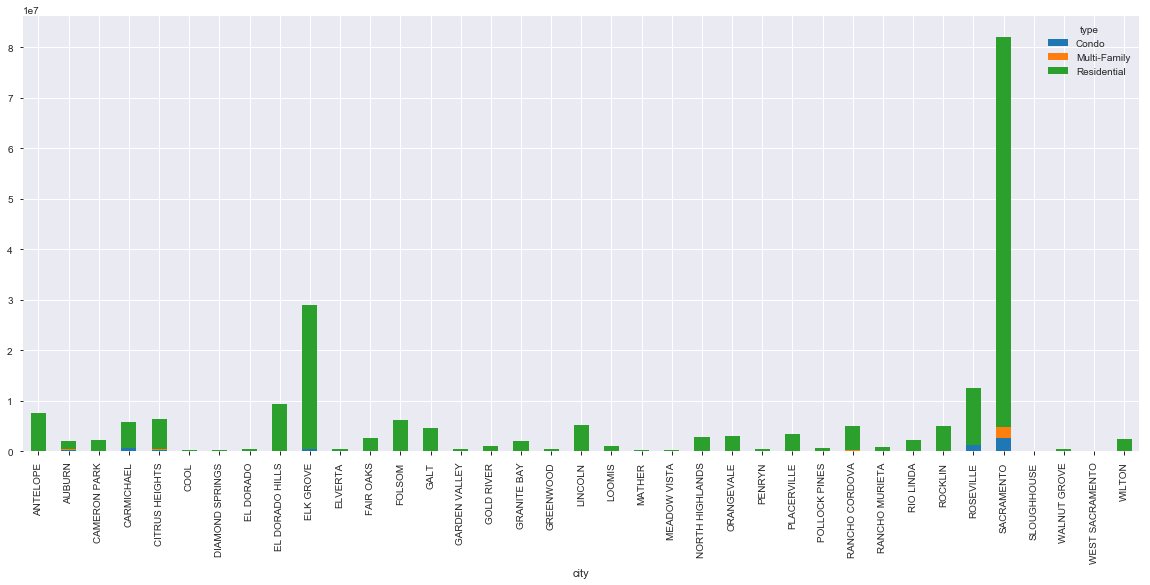

In [0]:
data2 = data1.groupby(["city", "type"])['price'].sum().unstack('type').fillna(0)
data2.plot(kind='bar', stacked=True,figsize=(20,8) )

**Lets do analysis of Sacramento**

In [0]:
data_s = data1[data1['city']== 'SACRAMENTO']    

In [0]:
data_s.sample(10)

city         type   price  sqft  beds  baths
45   SACRAMENTO  Residential  164000  1120     4      1
936  SACRAMENTO  Residential  189000  1039     3      1
746  SACRAMENTO  Residential  255000  1520     3      1
391  SACRAMENTO  Residential  150000  1646     3      2
950  SACRAMENTO  Residential  205000  1968     4      3
14   SACRAMENTO  Residential  108750  1022     2      2
186  SACRAMENTO  Residential  135000  1211     3      2
720  SACRAMENTO  Residential  225000  1441     3      2
368  SACRAMENTO        Condo  120000   958     2      2
659  SACRAMENTO  Residential  168750  1029     3      1

In [0]:
data_s = data_s[['type','price','sqft','beds','baths']] 

In [0]:
data_s.sample(10)

type   price  sqft  beds  baths
834  Residential  425000  1493     3      1
187  Residential  135500  1264     3      2
35   Residential  146250  1418     3      2
356  Residential  102750  1120     4      2
18   Residential  120000   588     2      1
633  Residential  130000  1120     3      2
868        Condo   60000   611     1      1
619  Residential  108000   810     2      1
911  Residential  157500  1302     3      2
980  Residential  232425  2280     4      3

In [0]:
sns.catplot("type", "price", data=data_s, kind="bar" ,palette="PuBuGn_d",height=6, aspect=2)
plt.xlabel('Year')
plt.ylabel('Total Trial')
plt.show()

NameError: name 'sns' is not defined

In [0]:
import seaborn as sns                                       # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

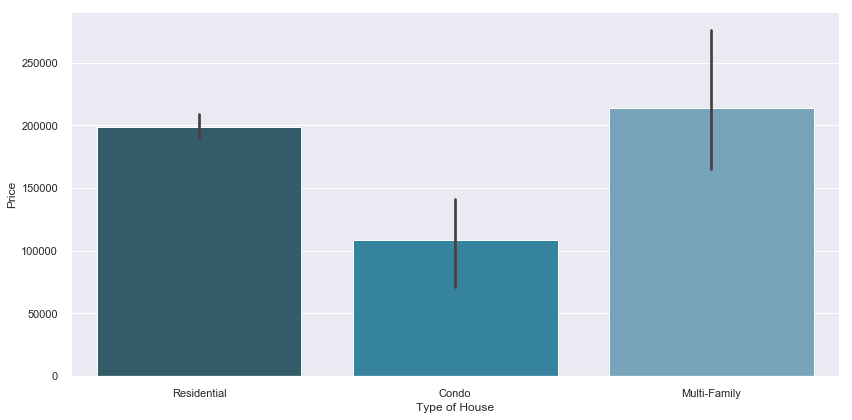

In [0]:
sns.catplot("type", "price", data=data_s, kind="bar" ,palette="PuBuGn_d",height=6, aspect=2)
plt.xlabel('Type of House')
plt.ylabel('Price')
plt.show()

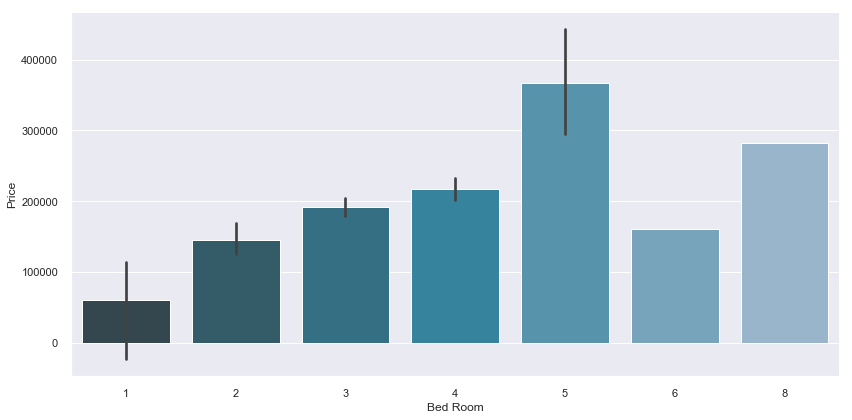

In [0]:
sns.catplot("beds", "price", data=data_s, kind="bar" ,palette="PuBuGn_d",height=6, aspect=2)
plt.xlabel('Bed Room')
plt.ylabel('Price')
plt.show()

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

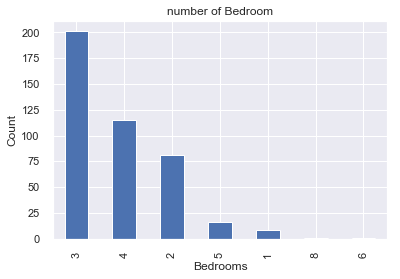

In [0]:
data_s['beds'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

**Something fishy with 6 & 8 bed rooms cant be so cheap, lets filter out as counts are negligible**

In [0]:
data_s = data_s[data_s['beds']!= 6]   
data_s = data_s[data_s['beds']!= 8]   

In [0]:
data_s.beds.unique()

array([2, 3, 1, 4, 5], dtype=int64)

Text(0.5, 1.0, 'Price vs Square Feet')

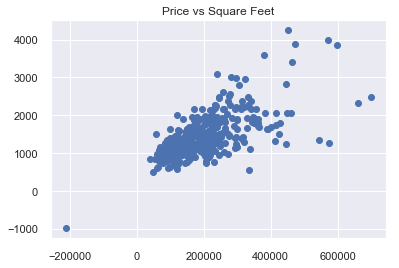

In [0]:
plt.scatter(data_s.price,data_s.sqft)
plt.title("Price vs Square Feet")

# OMG! negative price???

In [0]:
data_s = data_s[data_s['price']>= 0]   

Text(0.5, 1.0, 'Price vs Square Feet')

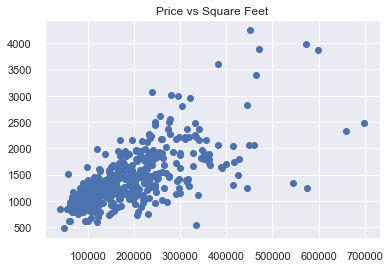

In [0]:
plt.scatter(data_s.price,data_s.sqft)
plt.title("Price vs Square Feet")

**Phew looks much better**

In [0]:
data_r = data_s.copy(deep=True)           #ready for regression          

In [0]:
data_r.sample()

type   price  sqft  beds  baths
381  Residential  133105  1139     2      1

# Regression

In [0]:
data_r.describe()

price         sqft        beds       baths
count     420.000000   420.000000  420.000000  420.000000
mean   194696.666667  1438.511905    3.123810    1.816667
std    100606.727717   538.652763    0.819747    0.642347
min     40000.000000   484.000000    1.000000    1.000000
25%    123731.250000  1092.000000    3.000000    1.000000
50%    173653.000000  1333.000000    3.000000    2.000000
75%    236358.750000  1673.000000    4.000000    2.000000
max    699000.000000  4246.000000    5.000000    4.000000

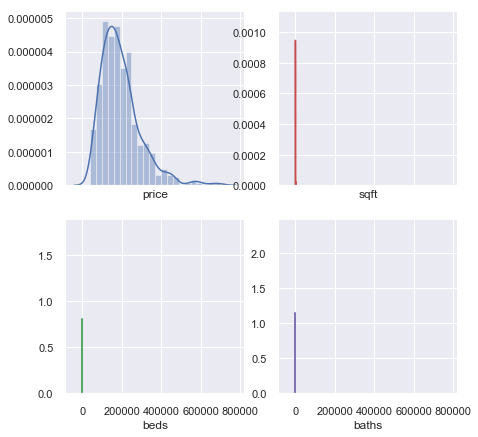

In [0]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data_r.price, color="b", ax=axes[0, 0])

sns.distplot(data_r.sqft, color="r", ax=axes[0, 1])

sns.distplot(data_r.beds, color="g", ax=axes[1, 0])

sns.distplot(data_r.baths, color="m", ax=axes[1, 1])

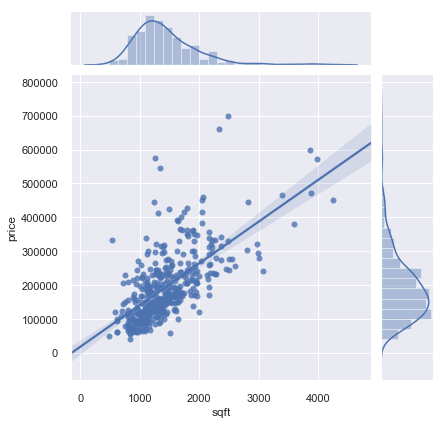

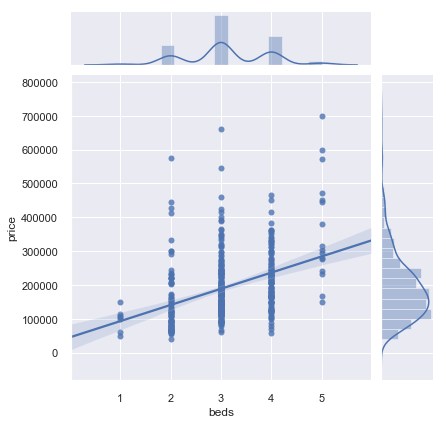

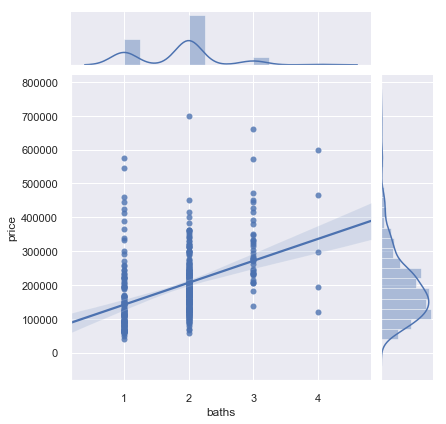

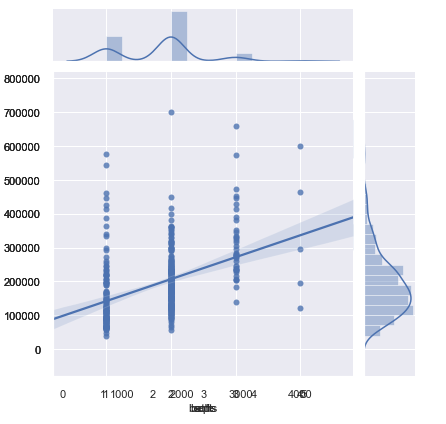

In [0]:
JG1 = sns.jointplot("sqft", "price", data=data_r, kind='reg')
JG2 = sns.jointplot("beds", "price", data=data_r, kind='reg')
JG3 = sns.jointplot("baths", "price", data=data_r, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

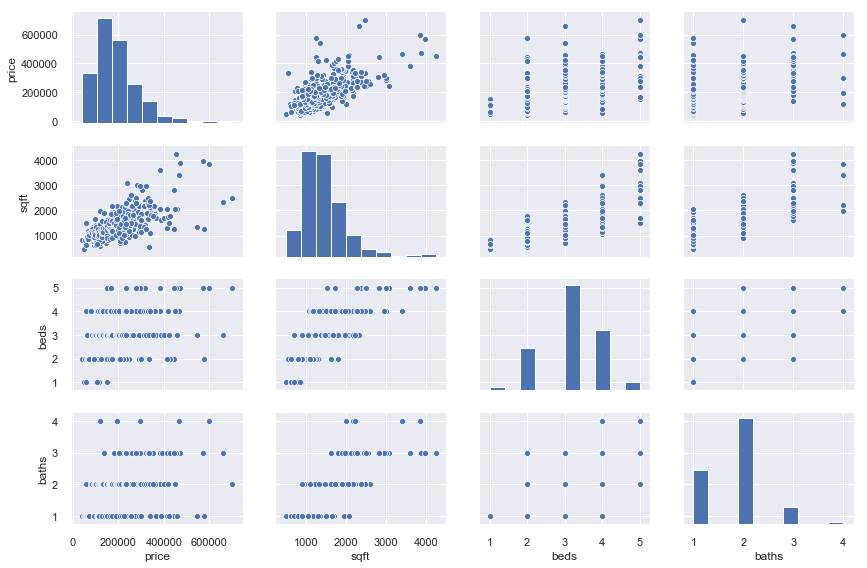

In [0]:
sns.pairplot(data_r, size = 2, aspect = 1.5)

<div class="alert alert-block alert-warning">
Above plots making no sense to me



# PLEASE HELP - What do I do next.

**Splitting data into train and test sets.**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Splitting the dataset into training and test sets.
data_train, data_test = train_test_split(data1, test_size = 0.2, random_state = 0)

In [0]:
# Dropping price from x_train and x_test matrices, and creating y_train and y_test vectors for price values.
x_train = data_train.drop(['price'], 1)
y_train = data_train['price']

In [0]:
x_test = data_test.drop(['price'], 1)
y_test = data_test['price']

In [0]:
# Checking the shapes of training and test sets.
print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

**Building Model**

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
# Creating our linear regression model and fitting the data into it.
linreg = LinearRegression()
linreg.fit(x_train, y_train)

**Making Predictions**

In [0]:
# Making predictions on the train set.
y_pred_train = linreg.predict(x_train)

In [ ]:
# Viewing the predictions on train set (only first 10 values).
y_pred_train[:10]

In [0]:
# Making predictions on the test set.
y_pred_test = linreg.predict(x_test)

In [0]:
# Viewing the predictions on test set (only first 10 values).
y_pred_test[:10]